In [ ]:
from keras import layers
from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, SimpleRNN, LSTM, GRU, Bidirectional
from keras import regularizers
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization
from keras import optimizers
import numpy.random as nr
from tensorflow import set_random_seed
import numpy as np


# %matplotlib inline/

In [ ]:

max_features = 10000
max_len = 250

old = np.load

In [ ]:
np.load = lambda *a,**k: old(*a,**k)


In [ ]:
(train_text, train_labels), (test_text, test_labels) = imdb.load_data(num_words = max_features)


In [ ]:
np.load = old
del(old)

In [ ]:
train_text = preprocessing.sequence.pad_sequences(train_text, maxlen = max_len)
test_text = preprocessing.sequence.pad_sequences(test_text, maxlen = max_len)
print(len(train_text))
print(train_text[1])

25000
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    1  194 1153  194 8255   78  228    5    6
 1463 4369 5012  134   26    4  715    8  118 1634   14  394   20   13
  119  954  189  102    5  207  110 3103   21   14   69  188    8   30
   23    7    4  249  126   93    4  114    9 2300 1523    5  647    4
  116    9   35 8163    4  229    9  340 1322    4  118    9    4  130
 4901   19    4 1002    5   89   29  952   46   37    4  455    9   45
   43   38 1543 1905  398    4 1649   26 6853    5  163   11 3215    2
    4 1153    9  194  775    7 8255    2  349 2637  148  605    2 8003
   15  123  125   68    2 6853   15  349  165 4362   98    5    4  228
    9   43    2 1157   15  299  120    5  120  174   11  220  175  136


In [ ]:

embedding = Sequential()
## First add an embedding layer
embedding.add(Embedding(10000, 8, input_length = max_len, embeddings_regularizer = regularizers.l2(0.01)))
## Flatten the embedding of the features
embedding.add(Flatten())
## Now the  binary classifier layer
embedding.add(Dense(1, activation = 'sigmoid'))
embedding.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['acc'])
embedding.summary()






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 8)            80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2001      
Total params: 82,001
Trainable params: 82,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:

nr.seed(3421)
set_random_seed(654)
historyEMB = embedding.fit(train_text, train_labels,
                   epochs = 20,
                   batch_size = 256,
                   validation_data = (test_text, test_labels))




Train on 25000 samples, validate on 25000 samples
Epoch 1/20





25000/25000 [==============================] - 1s 44us/step - loss: 0.7564 - acc: 0.5537 - val_loss: 0.6816 - val_acc: 0.6212
Epoch 2/20
25000/25000 [==============================] - 1s 36us/step - loss: 0.6498 - acc: 0.6928 - val_loss: 0.6175 - val_acc: 0.7339
Epoch 3/20
25000/25000 [==============================] - 1s 35us/step - loss: 0.5878 - acc: 0.7674 - val_loss: 0.5656 - val_acc: 0.7791
Epoch 4/20
25000/25000 [==============================] - 1s 35us/step - loss: 0.5464 - acc: 0.7993 - val_loss: 0.5317 - val_acc: 0.8065
Epoch 5/20
25000/25000 [==============================] - 1s 35us/step - loss: 0.5179 - acc: 0.8157 - val_loss: 0.5092 - val_acc: 0.8180
Epoch 6/20
25000/25000 [==============================] - 1s 36us/step - loss: 0.4959 - acc: 0.8288 - val_loss: 0.4887 - val_acc: 0.8310
Epoch 7/20
25000/25000 [==============================] - 1s 35us/step - loss: 0.4771 - acc: 0.8382 - val_loss: 0.4771 -

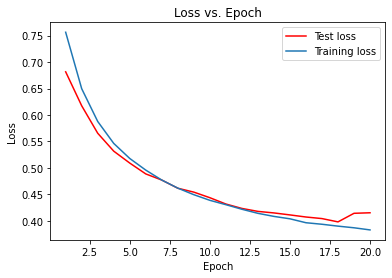

In [ ]:
def plot_loss(history):
    '''Function to plot the loss vs. epoch'''
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'Test loss')
    plt.plot(x, train_loss, label = 'Training loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    
plot_loss(historyEMB)

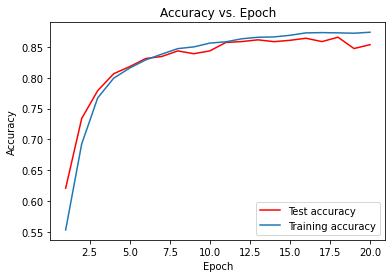

In [ ]:
def plot_accuracy(history):
    train_acc = history.history['acc']
    test_acc = history.history['val_acc']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color = 'red', label = 'Test accuracy')
    plt.plot(x, train_acc, label = 'Training accuracy')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')  
    
plot_accuracy(historyEMB)

In [ ]:
RNN1 = Sequential()
## First add an embedding layer
RNN1.add(Embedding(max_features, 32, embeddings_regularizer = regularizers.l2(0.01)))
## Now add an RNN layer
RNN1.add(SimpleRNN(32, kernel_regularizer = regularizers.l2(0.01)))
## And the classifier layer
RNN1.add(Dense(1, activation = 'sigmoid'))
RNN1.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['acc'])
RNN1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nr.seed(6754)
set_random_seed(7766)
historyRNN = RNN1.fit(train_text, train_labels,
                   epochs = 20,
                   batch_size = 1024,
                   validation_data = (test_text, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 8s 318us/step - loss: 1.9149 - acc: 0.5301 - val_loss: 1.1505 - val_acc: 0.5213
Epoch 2/20
25000/25000 [==============================] - 8s 301us/step - loss: 0.9731 - acc: 0.5806 - val_loss: 0.8691 - val_acc: 0.5478
Epoch 3/20
25000/25000 [==============================] - 7s 299us/step - loss: 0.8298 - acc: 0.6316 - val_loss: 0.8148 - val_acc: 0.6787
Epoch 4/20
25000/25000 [==============================] - 8s 300us/step - loss: 0.7959 - acc: 0.6736 - val_loss: 0.7738 - val_acc: 0.6732
Epoch 5/20
25000/25000 [==============================] - 7s 299us/step - loss: 0.7086 - acc: 0.7486 - val_loss: 0.6930 - val_acc: 0.7390
Epoch 6/20
25000/25000 [==============================] - 7s 296us/step - loss: 0.6878 - acc: 0.7476 - val_loss: 0.6625 - val_acc: 0.7774
Epoch 7/20
25000/25000 [==============================] - 7s 300us/step - loss: 0.6367 - acc: 0.7718 - val_loss: 0.6729 - 

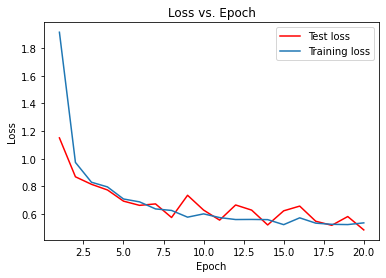

In [ ]:
plot_loss(historyRNN)


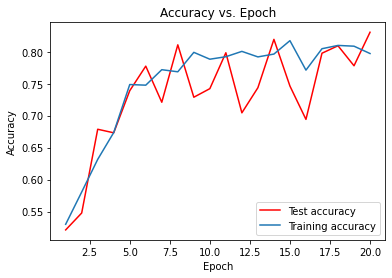

In [ ]:
plot_accuracy(historyRNN)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
from google.colab import drive #toimport google drive data
drive.mount('/content/drive') #to mount the drive data into colab clound and enterr the activation code


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
cd /content/drive/"My Drive"


/content/drive/My Drive


In [ ]:
apple_training_complete=pd.read_csv("NG Machine Learning/yahoofinance.csv")


In [ ]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)

In [ ]:
features_set = []
labels = []
for i in range(60, 250):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])

In [ ]:
features_set, labels = np.array(features_set), np.array(labels)


In [ ]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
model = Sequential()


In [ ]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))


In [ ]:
model.add(Dropout(0.2))


In [ ]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(units = 1))


In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [ ]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)


Epoch 1/100
190/190 [==============================] - 5s 27ms/step - loss: 0.2757
Epoch 2/100
190/190 [==============================] - 1s 6ms/step - loss: 0.0767
Epoch 3/100
190/190 [==============================] - 1s 6ms/step - loss: 0.0339
Epoch 4/100
190/190 [==============================] - 1s 6ms/step - loss: 0.0302
Epoch 5/100
190/190 [==============================] - 1s 6ms/step - loss: 0.0207
Epoch 6/100
190/190 [==============================] - 1s 6ms/step - loss: 0.0210
Epoch 7/100
190/190 [==============================] - 1s 6ms/step - loss: 0.0164
Epoch 8/100
190/190 [==============================] - 1s 6ms/step - loss: 0.0203
Epoch 9/100
190/190 [==============================] - 1s 6ms/step - loss: 0.0149
Epoch 10/100
190/190 [==============================] - 1s 6ms/step - loss: 0.0134
Epoch 11/100
190/190 [==============================] - 1s 6ms/step - loss: 0.0147
Epoch 12/100
190/190 [==============================] - 1s 6ms/step - loss: 0.0120
Epoch 13/100

In [ ]:
apple_testing_processed = apple_training_complete.iloc[:, 1:2].values

In [ ]:
apple_total = pd.concat((apple_training_complete['Open'], apple_training_complete['Open']), axis=0)


In [ ]:
test_inputs = apple_total[len(apple_total) - len(apple_training_complete) - 60:].values


In [ ]:
test_inputs

array([291.119995, 289.459991, 289.929993, 296.23999 , 297.149994,
       293.790009, 299.839996, 297.160004, 307.23999 , 310.600006,
       311.640015, 316.700012, 311.850006, 313.589996, 316.269989,
       317.190002, 318.579987, 317.920013, 320.25    , 310.059998,
       312.600006, 324.450012, 320.540009, 320.929993, 304.299988,
       315.309998, 323.519989, 322.570007, 322.369995, 314.179993,
       323.600006, 321.470001, 324.190002, 324.73999 , 315.359985,
       320.      , 322.630005, 318.619995, 297.26001 , 300.950012,
       286.529999, 281.100006, 257.26001 , 282.279999, 303.670013,
       296.440002, 295.519989, 282.      , 263.75    , 277.140015,
       277.390015, 255.940002, 264.890015, 241.949997, 247.509995,
       239.770004, 247.389999, 247.179993, 228.080002, 236.360001,
       191.509995, 191.660004, 188.75    , 188.949997, 189.830002,
       191.639999, 191.089996, 193.25    , 194.789993, 196.449997,
       196.419998, 200.320007, 198.679993, 200.850006, 199.199

In [ ]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
test_features = []
for i in range(60,250):
    test_features.append(test_inputs[i-60:i, 0])

In [ ]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))


In [ ]:
predictions = model.predict(test_features)


In [ ]:
predictions = scaler.inverse_transform(predictions)


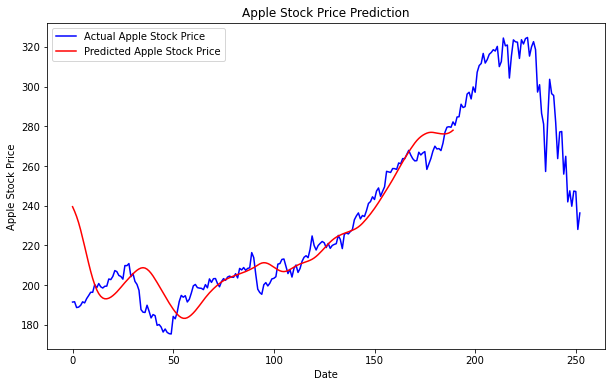

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [ ]:
from urllib.request import urlopen

In [ ]:
url = "https://www.gutenberg.org/files/11/11-0.txt"
file = urlopen(url)
document=(file.read())

In [27]:
document

b'The Project Gutenberg EBook of Alice\xe2\x80\x99s Adventures in Wonderland, by Lewis Carroll\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: Alice\xe2\x80\x99s Adventures in Wonderland\r\n\r\nAuthor: Lewis Carroll\r\n\r\nRelease Date: June 25, 2008 [EBook #11]\r\nLast Updated: February 22, 2020\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\xe2\x80\x99S ADVENTURES IN WONDERLAND ***\r\n\r\n\r\n\r\nProduced by Arthur DiBianca and David Widger\r\n\r\n[Illustration]\r\n\r\n\r\n\r\n\r\nAlice\xe2\x80\x99s Adventures in Wonderland\r\n\r\nby Lewis Carroll\r\n\r\nTHE MILLENNIUM FULCRUM EDITION 3.0\r\n\r\nContents\r\n\r\n CHAPTER I.     Down the Rabbit-Hole\r\n CHAPTER II.    The Pool of Tears\

In [ ]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

In [ ]:
document=document.lower()

In [ ]:
# create mapping of unique chars to integers
chars = sorted(list(set(document)))             #set of all distinct characters
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [ ]:
list(set(document))

[128,
 10,
 13,
 148,
 152,
 153,
 156,
 157,
 32,
 33,
 34,
 35,
 36,
 37,
 39,
 40,
 41,
 42,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 185,
 58,
 59,
 57,
 63,
 64,
 195,
 91,
 120,
 93,
 95,
 97,
 98,
 99,
 226,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 100,
 110,
 111,
 112,
 109,
 114,
 115,
 116,
 117,
 118,
 119,
 113,
 121,
 122]

In [31]:
n_chars = len(document)
n_vocab = len(chars)
print ("Total Characters: ", n_chars)
print ("Total Vocab: ", n_vocab)

Total Characters:  174481
Total Vocab:  68


In [ ]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = document[i:i + seq_length]
	seq_out = document[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print ("Total Patterns: ", n_patterns)

Total Patterns:  174381


In [ ]:
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

In [ ]:
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [ ]:
model.fit(X, y, epochs=10, batch_size=128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





 29184/174381 [====>.........................] - ETA: 15:55 - loss: 3.2602

KeyboardInterrupt: ignored

In [ ]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

In [ ]:
filename = "NG Machine Learning/alice.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()

In [ ]:
# create mapping of unique chars to integers, and a reverse mapping
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))
# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print ("Total Characters: ", n_chars)
print ("Total Vocab: ", n_vocab)

Total Characters:  151062
Total Vocab:  52


In [ ]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print ("Total Patterns: ", n_patterns)

Total Patterns:  150962


In [ ]:
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]


In [ ]:
model.fit(X, y, epochs=10, batch_size=128, callbacks=callbacks_list)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





150962/150962 [==============================] - 245s 2ms/step - loss: 3.0410

Epoch 00001: loss improved from inf to 3.04098, saving model to weights-improvement-01-3.0410.hdf5
Epoch 2/10
150962/150962 [==============================] - 236s 2ms/step - loss: 2.6848

Epoch 00002: loss improved from 3.04098 to 2.68477, saving model to weights-improvement-02-2.6848.hdf5
Epoch 3/10
150962/150962 [==============================] - 237s 2ms/step - loss: 2.5457

Epoch 00003: loss improved from 2.68477 to 2.54567, saving model to weights-improvement-03-2.5457.hdf5
Epoch 4/10
150962/150962 [==============================] - 241s 2ms/step - loss: 2.4583

Epoch 00004: loss improved from 2.54567 to 2.45830, saving model to weights-improvement-04-2.4583.hdf5
Epoch 5/10
150962/150962 [==============================] - 246s 2ms/step - loss: 2.3896

Epoch 00005: loss improved from 2.45830 

In [ ]:
# load the network weights
filename = "weights-improvement-10-2.1507.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [ ]:
# pick a random seed
generate=""
start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print ("Seed:")
print ("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
for i in range(1000):
  x = numpy.reshape(pattern, (1, len(pattern), 1))
  x = x / float(n_vocab)
  prediction = model.predict(x, verbose=0)
  index = numpy.argmax(prediction)
  result = int_to_char[index]
  print(result)
  generate+=result
  seq_in = [int_to_char[value] for value in pattern]
  pattern.append(index)
  pattern = pattern[1:len(pattern)]

print(generate)
print ("\nDone.")

Seed:
" s,â€ said alice doubtfully: â€œit meansâ€”toâ€”makeâ€”anythingâ€”prettier.â€

â€œwell, then,â€ th "
i
 
g
o
t
p
h
o
n
 
w
e
i
t
 
o
n
 
 
â
€
œ
i
n
 
w
h
u
 
 
t
o
e
l
e
 
t
o
e
t
 
â
€

 
s
h
e
 
s
a
i
d
 
t
o
 
h
e
r
s
e
l
f
,
 
â
€
œ
i
n
 
w
h
u
 
 
t
o
e
l
e
 
t
o
e
t
 
â
€





â
€
œ
i
 
w
h
n
h
 
t
o
e
 
s
o
r
e
d
 
â
€

 
s
a
i
d
 
t
h
e
 
c
o
t
h
o
u
s
e
,
 
a
n
d
 
t
h
e
 
w
o
i
d
e
 
t
a
s
 
a
o
o
 
t
h
e
 
w
o
i
d
e
 
t
h
 
t
h
e
 
w
o
i
d
e
 
 
a
n
d
 
t
h
e
 
w
o
i
d
e
 
t
a
s
 
s
o
e
n
e
 
t
h
e
 
w
o
i
d
e
 
t
h
e
 
w
a
s
 
o
o
 
t
a
e
 
t
h
e
 
w
a
s
 
o
o
 
t
a
e
 
t
h
e
 
w
a
s
 
o
o
 
t
a
e
 
t
h
e
 
w
a
s
 
o
o
 
t
a
e
 
t
h
e
 
w
a
s
 
o
o
 
t
a
e
 
t
h
e
 
w
a
s
 
o
o
 
t
a
e
 
t
h
e
 
w
a
s
 
o
o
 
t
a
e
 
t
h
e
 
w
a
s
 
o
o
 
t
a
e
 
t
h
e
 
w
a
s
 
o
o
 
t
a
e
 
t
h
e
 
w
a
s
 
o
o
 
t
a
e
 
t
h
e
 
w
a
s
 
o
o
 
t
a
e
 
t
h
e
 
w
a
s
 
o
o
 
t
a
e
 
t
h
e
 
w
a
s
 
o
o
 
t
a
e
 
t
h
e
 
w
a
s
 
o
o
 
t
a
e
 
t
h
e
 
w
a
s
 
o
o
 
t
a
e
 
t
h
e
 

In [ ]:
generate

'i gotphon weit on  â€œin whu  toele toet â€\x9d she said to herself, â€œin whu  toele toet â€\x9d\n\nâ€œi whnh toe sored â€\x9d said the cothouse, and the woide tas aoo the woide th the woide  and the woide tas soene the woide the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was oo tae the was